<a href="https://colab.research.google.com/github/EDANHS/ADA-informes/blob/main/Informe9-OrdenTopol%C3%B3gico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Orden topológico

###Definición del orden topológico

Sea $G=(V,E)$ un grafo dirigido. Un orden topológico de $G$ es una asignación $f(v)$ a cada vértice $v\in V$ con distintos números, tal que para cada arco $(v,w)\in E$, se cumple que $f(v)<f(w)$.

# 1. Descripción del problema

---


Dadas algunas actividades, tareas, etc. que posean alguna restricción previa, que no permite empezar alguna actividad sin completar otras, se pide encontrar un orden para realizarlas. El ordenamiento topológico es un algoritmo que sirve para ordenar alguna actividad que posee una restricción previa devolviendo una secuencia de dichas actividades respetando las restricciones.

$Entrada:$ Grafo dirigido sin ciclos $G=(V,E)$.

$Salida:$ Un orden topológico de los vértices de $G$. Es decir, una asignación $f(v)$ a cada vértice $v\in V$, tal que para cada arco $(v,w)\in E$, se cumple que $f(v)<f(w)$.

---

# 2. Descripción del algoritmo

---

Para encontrar un orden topológico de un grafo $G$, se debe saber que es una **búsqueda en profundidad**, dicha búsqueda es un algoritmo que recorre cada nodo en un grafo de manera ordenada, esta tiene tres tipos de recorridos:

* En pre-orden
* En orden
* En post-orden

En el algoritmo de ordenamiento topológico se ocupa **post-orden** para encontrar el orden lineal que se debe seguir para realizar las tareas, dicho recorrido se encarga de visitar todos los hijos.


![image](https://i.stack.imgur.com/4goj8.jpg)

*Imagen extraída de stackoverflow*


Teniendo claro la búsqueda en profundidad post orden, podemos decir que para un grafo $G$, de tamaño $n$, los pasos que realiza el algoritmo son los siguientes:

1. Se debe tener un contador $F$ que indique la cantidad de nodos en el grafo.

2. La búsqueda comienza en un nodo aleatorio sin visitar.

3. Se aplica búsqueda en profundidad en el grafo.

4. En consecuencia a la búsqueda en profundidad, al visitar un nodo se le asigna un valor $f(v)$, donde dicho valor es igual a $F$.

5. Como ya $F$ fue asignado a un nodo, $F$ pasa a ser $F - 1$

6. Se repiten los pasos hasta haber asignado a los $n$ nodos los $F$ valores.

---

#3. Código

A continuación, se mostrará la implementación del algoritmo de orden topológico recursivo con DFS-Post-orden.

In [ ]:
from networkx.drawing.nx_pydot import graphviz_layout
from collections import defaultdict
import math
import random
import matplotlib.pyplot as plt
import networkx as nx
from termcolor import colored

## Código de visualización

1. Código para visualizar el grafo.

In [ ]:
def visualize(G):
  pos=nx.spring_layout(G)
  labels = nx.get_edge_attributes(G,'weight')
  nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=14)
  node_size = 500
  nx.draw(G, pos, with_labels=True, node_size=node_size, font_color="black", font_size=8, width  =1.0)
  nodes = nx.draw_networkx_nodes(G, pos,  node_size=node_size, node_color="white")
  nodes.set_edgecolor('black')

## Generador de instacias

1. Aqui estan los codigos que permiten generar un grafo

In [ ]:
# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):

  ##Crea un arreglo entre 0 y v hasta v
  nodes = random.sample(range(0, V), V)
  ##Divide crear una variable que divide el tamaño en 4
  div = int(math.ceil(V / 4))

  ##Asigna div a un current
  current_div = div
  ##Crea un diccionario
  graph = defaultdict(list)

  ##calcula el tamaño de los nodos, en un rango de 0 a n, y
  ##luego lo revierte, por lo que va desde n hasta 0
  for i in reversed(range(len(nodes))):

    ##Crea una lista auxiliar
    selectables = []

    ##Si n - current <= 0, la lista auxiliar es una random 
    ## de nodes, escogidos aleatoriamente entre 1 y n
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      ##lista que se crea de 0 hasta n - current
      population = nodes[:len(nodes)-current_div]
      ##manejo de caso si no da justo 4
      end = len(population) if len(population) < 4 else 4
      ##la lista auxiliar se obtiene de population que va
      ## desde 1 hasta end
      selectables = random.sample(population, random.randint(1, end))
    
    ##Una vez creada la lista auxiliar, se itera a traves de 
    ##Esta obteniendo los objetos que almacena
    for selectable in selectables:
      ##Si el nodo i-ésimo es distinto de selectable y no 
      ##esta en el grafo, lo agregamos
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)

    ##actualizamos current aumentandolo en 4
    if (i < len(nodes) - current_div):
      current_div += div

  return graph

In [ ]:
# Recibe un grafo de tipo [defaultdict(list)]
# Retorna un nx.DiGraph de la libreria networkx
# Se modifico para crear una copia del grafo
def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()
  nxdigraph1 = nx.DiGraph() 
  for i in graph.keys():
    nxdigraph.add_node(i)
    nxdigraph1.add_node(i)
    for v in graph[i]:
      nxdigraph.add_edge(i, v)
      nxdigraph1.add_edge(i, v)
  return nxdigraph,nxdigraph1

## Algoritmos de orden topológico recursivo

2. Primero que nada tenemos el algoritmo DFS-Post-orden recursivo

In [232]:
def topologicalSort(G,node,visited,stack,Verbose = False):
  visited[node] = True
  if Verbose == True:
    print("-------------------")
  for i in G[node]:
    if Verbose == True:
      print(colored("En nodo: ",'yellow'),colored(i,'cyan')," buscando si fue visitado")
    if visited[i] == False:
      if Verbose == True:
        print("Nodo ",colored(i,'red')," no visitado, llamando a la función recursivamente")
      topologicalSort(G,i,visited,stack,Verbose)
  if Verbose == True:
    print("-------------------")
  if Verbose == True:
    print("agregando nodo: ",colored(node,'red'),"al stack")
  stack.append(node)


def DFS(G,Verbose = False):
  visited = [False]*len(G)
  arr = []
  if Verbose == True:
    print("====================================")
    print(colored("Buscando el orden topológico...",'green'))
  for node in G:
    if visited[node] == False:
      if Verbose == True:
        print("Buscando orden topológico en nodo",colored(node,'blue'))
      topologicalSort(G,node,visited,arr,Verbose)
  
  if Verbose == True:
    print("====================================")

  return arr[::-1]

def recursive(G = None, G1 = None, Verbose = False, Visualize = False):
  if Verbose  == True:
    print("--------------",colored("Verbose DFS Recursivo",'magenta'),"--------------")
    print("El grafo posee:",end=' ')
    print(colored(G,'cyan'))
    print("-----------------------------------------------")

  arr = DFS(G,Verbose)

  if Verbose == True:
    print("-----------------------------------------------")
    print("El orden topológico para el grafo G es:")
    print(colored(arr,'red'))
    print("-----------------------------------------------")

  ##Mostrar despues de encontrar el orden topológico
  if Visualize == True:
    print("\n------------------",colored("Grafo 'G'",'blue'),"------------------")
    visualize(G1)


## Algoritmo de orden topológico iterativo

3. En segunda instancia esta el algoritmo DFS-Post-orden iterativo.


In [222]:
def dfs(T, initial=0,orden=[],Verbose = False):
   
   if Verbose == True:
     print("===============================================")
     print(colored("Entrando al DFS...",'yellow'))

   state = dict()
   for n in T: state[n]="no descubierto"
   
   if Verbose == True:
     print("Marcando el grafo:",end=" ")
     print(colored(T,'cyan'))
     print("como:",colored("no descubierto",'red'),end='\n\n')

   S=[initial] #stack
   count = 1

   while len(S)>0:
     n=S.pop()

     if state[n]=="no descubierto": #primera pasada
       state[n]="descubierto"
       S.append(n)
       for adj in reversed(list(T[n])):
         if state[adj]== "no descubierto": S.append(adj)
     elif state[n]=="descubierto": #segunda pasada
       state[n] ="visitado"
       orden.append(n)
       if Verbose == True:
          print("Agregando el elemento:",colored(n,'red'),"al orden topológico")

   if Verbose == True:
     print("===============================================")

##Copiar lo de una lista a otra
def copy(orden,orden1):
  for i in orden1:
    orden.append(i)

def eliminar(G,aux):
  for i in aux:
      G.remove_node(i)
  return G

def DFS_iterative(G,Verbose = False):
  arr = []
  aux = []
  initial = 0

  if Verbose == True:
    print(colored("Buscando el orden topológico...",'green'))

  while G.number_of_nodes()>0:

    #DFS
    dfs(G,initial,aux,Verbose)

    #Copiar contenido
    copy(arr,aux)

    ##Eliminar nodos
    G = eliminar(G, aux)

    if Verbose == True:
      print("===============================================")
      print("---Eliminando nodos ya visitados del grafo----")
      print(colored(G,'magenta'))
      print(colored("Grafo actual:",'cyan'),end=' ')
      print(colored(list(G),'red'))
      print("===============================================\n")

    if G.number_of_nodes() == 0: 
      if Verbose == True:
        print(colored("Como ya no hay nodos por recorrer tenemos listo",'yellow'))
        print(colored("nuestro orden topológico ;)",'yellow'))
      break


    #declarar el primer nodo
    initial = list(G.nodes)[0]

    #limpiar lista auxiliar
    aux.clear()

  if Verbose == True:
    print("Orden topológico obtenido al final del algoritmo:")
    print(colored(arr,'blue'))
  arr = arr[::-1]
  return arr
  


##Algoritmo para ver grafo, verbose y calcular el orden topologico
def iterative(G = None, G1 = None, Verbose = False, Visualize = False):

  if Verbose  == True:
    print("--------------",colored("Verbose DFS Iterativo",'magenta'),"--------------")
    print("El grafo posee:",end=' ')
    print(colored(G,'cyan'))
    print("-----------------------------------------------")

  arr = DFS_iterative(G,Verbose)
  
  if Verbose == True:
    print("-----------------------------------------------")
    print("El orden topológico para el grafo G es:")
    print(colored(arr,'red'))
    print("-----------------------------------------------")

  ##Mostrar despues de encontrar el orden topológico
  if Visualize == True:
    print("\n------------------",colored("Grafo 'G'",'blue'),"------------------")
    visualize(G1)


##Ejemplo con Vizualize y Verbose con valor 'True'

1. A continuación, se muestra el algoritmo recursiva para encontrar el orden topológico de un grafo de tamaño 5 generado de manera aleatoria con el creador de grafos entregado en la guía. Al pasar la variable Verbose = True, podemos ver los pasos del algoritmo y al pasar la variable Visualize = True se muestra el grafo.

-------------- Verbose DFS Recursivo --------------
El grafo posee: DiGraph with 5 nodes and 9 edges
-----------------------------------------------
Buscando el orden topológico...
Buscando orden topológico en nodo 4
-------------------
En nodo:  1  buscando si fue visitado
Nodo  1  no visitado, llamando a la función recursivamente
-------------------
En nodo:  2  buscando si fue visitado
Nodo  2  no visitado, llamando a la función recursivamente
-------------------
-------------------
agregando nodo:  2 al stack
-------------------
agregando nodo:  1 al stack
En nodo:  2  buscando si fue visitado
En nodo:  3  buscando si fue visitado
Nodo  3  no visitado, llamando a la función recursivamente
-------------------
En nodo:  2  buscando si fue visitado
En nodo:  1  buscando si fue visitado
-------------------
agregando nodo:  3 al stack
-------------------
agregando nodo:  4 al stack
Buscando orden topológico en nodo 0
-------------------
En nodo:  3  buscando si fue visitado
En nodo:  1 

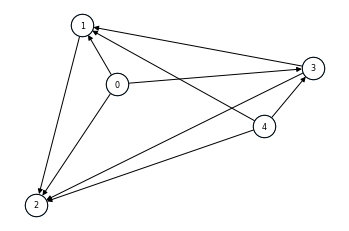

In [235]:
T,T1 = graph_to_nxdigraph(graph_instance_creator(5))
recursive(T,T1,True,True)

2. A continuación, se muestra el algoritmo iterativo para encontrar el orden topológico de un grafo de tamaño 5 generado de manera aleatoria con el creador de grafos entregado en la guía, al pasar la variable Verbose = True, podemos ver los pasos del algoritmo y al pasar la variable Visualize = True se muestra el grafo.

-------------- Verbose DFS Iterativo --------------
El grafo posee: DiGraph with 5 nodes and 6 edges
-----------------------------------------------
Buscando el orden topológico...
Entrando al DFS...
Marcando el grafo: DiGraph with 5 nodes and 6 edges
como: no descubierto

Agregando el elemento: 2 al orden topológico
Agregando el elemento: 3 al orden topológico
Agregando el elemento: 0 al orden topológico
---Eliminando nodos ya visitados del grafo----
DiGraph with 2 nodes and 1 edges
Grafo actual: [1, 4]

Entrando al DFS...
Marcando el grafo: DiGraph with 2 nodes and 1 edges
como: no descubierto

Agregando el elemento: 4 al orden topológico
Agregando el elemento: 1 al orden topológico
---Eliminando nodos ya visitados del grafo----
DiGraph with 0 nodes and 0 edges
Grafo actual: []

Como ya no hay nodos por recorrer tenemos listo
nuestro orden topológico ;)
Orden topológico obtenido al final del algoritmo:
[2, 3, 0, 4, 1]
-----------------------------------------------
El orden topológic

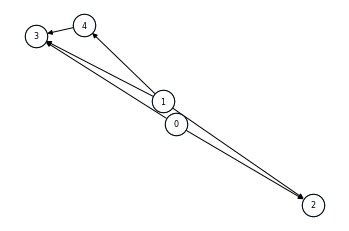

In [223]:
G,G1 = graph_to_nxdigraph(graph_instance_creator(5))
iterative(G,G1,True,True)

# 4. Correctitud

Para demostrar que el algoritmo es correcto debemos tener en cuenta la siguiente restricción: “Para encontrar el orden topológico de un grafo dirigido, este debe ser acíclico” o mejor dicho, que no posea ciclos.
¿Como podemos demostrar que un grafo dirigido es acíclico? Primero vamos a plantear una hipótesis.

---

####**Hipótesis:**  *Si un grafo es dirigido y acíclico entonces debería existir un orden topológico.*

---

Se intentará validar dicha hipótesis mediante el siguiente teorema.

---

####**Teorema:** *Cualquier grafo dirigido sin ciclos tiene al menos un orden topológico.*

---

Para demostrar dicho teorema se deben considerar el siguiente lema.

---

####**Lema 1:** *Todo DAG (Grafo acíclico dirigido) tiene un origen.*

El lema 1 se puede demostrar al escoger un vértice arbitrario de un grafo acíclico dirigido y recorrerlo hacia el origen. Si es acíclico llegaremos a un vértice origen.

El teorema se demuestra pensando en la idea de crear un orden topológico de izquierda a derecha tomando un vértice origen.

**Prueba del teorema:**

Sea un grafo G acíclico dirigido con ‘n’ vértices. Se debe asignar valores $f$ a los vértices de forma creciente de 1 hasta $n$. Al dejar un vértice $‘v_1’ $ como vértice origen, nos aseguramos que el ordenamiento no se realizara en otro sentido, por ende, es obligatorio escoger un vértice origen para asignar valor a $f$.

Gracias al lema 1, nos asegura la existencia de G, entonces a su vértice $‘v_1’ $ se le asigna el valor f(v_1) = 1. Si ocupamos recursividad, podemos generar un grafo $G_0$ al eliminar el vértice $‘v_1’$, dando que los vértices que se pueden marcar partiendo de 2 hasta n y como G es acíclico dirigido, condena a que G0 también lo sea, puesto que eliminar cosas no crea ciclos nuevos entonces queda comprobado que $G_0$ es acíclico dirigido. Al ir reduciendo el grafo por recursión se puede crear el orden topológico eliminando vértices.

---

Ahora que demostramos que todo grafo dirigido acíclico posee orden topológico se debe demostrar que el algoritmo encuentra dicho orden, con ello se debe preguntar: ¿Es posible encontrar un orden topológico para un grafo dirigido acíclico mediante un algoritmo?, a dicha pregunta se da la siguiente hipótesis.

---

####**Hipótesis:** *Existe un algoritmo que permite encontrar el orden topológico de un grafo dirigido acíclico.*

---

Para esto se determina el siguiente teorema.

---

####**Teorema:** El algoritmo para encontrar un orden topológico de un grafo dirigido acíclico retorna una secuencia de los elementos con cierto orden.

---

Mediante inducción probaremos que el algoritmo es correcto.

Sea $P(1)$ el caso base donde el grafo posee un único elemento, se puede considerar su orden topológico como el mismo elemento sin otra opción posible, en caso de tener un grafo con dos nodos y un arco se podría considerar también como un caso base el nodo origen y luego el siguiente nodo.
Dado que el algoritmo se implementa mediante BFS en Post-orden, tenemos un recorrido de final a inicio, esto debemos tenerlo en consideración para explicar el siguiente paso.

Para $P(m)$ casos con m < n, se puede considerar que el algoritmo asignará un favor $f$ a un nodo $’v’$ desde $m$ hasta 1, por ende, se tendrá un orden de recorrido para el grafo $G_0$, a medida que se va visitando y asignando valores al grafo, el algoritmo va guardando el orden topológico encontrado desde el ultimo nodo que iría en dicho orden hasta el nodo m, por lo tanto, obtenemos un orden que va de fin a inicio mientras se visitan los nodos.

Como el grafo $G_0$ es dirigido y acíclico completará su recorrido a los $n$ nodos, dando que se encontrará un orden topológico para el grafo $G$, por lo que se demuestra que el algoritmo es correcto.

---

##5. Tiempo de Ejecución:

**Teorema:** El tiempo de ejecución para encontrar el orden topológico es $O(|V|+|E_v|)$.

En base al teorema anterior, podemos calcular el tiempo de ejecución considerando lo siguiente:

Para encontrar el tiempo de ejecución del orden topológico, se realizará un análisis específico a cada paso que realiza el algoritmo:

---
###Paso 1: Creación de listas.

Este paso sólo crea estructuras auxiliares que se utilizarán la función en los siguientes procedimientos. Por lo tanto, este paso tiene complejidad temporal $O(1)$.

---
###Paso 2: Ciclo de DFS.

####Paso 2.1: DFS.
En este paso se llama a la función "DFS" para realizar una búsqueda en profundidad en el grafo según el valor "initial" que se le haya asignado en un inicio. El DFS debe recorrer una cierta cantidad de nodos $m$, cumpliéndose que $m < V$, con $V$ = cantidad de nodos en el grafo. Durante el recorrido, se debe agregar a la lista auxiliar creada los nodos que son visitados.

Al trabajar con un "sub-grafo" el DFS que tarda en promedio a nivel general $O(|V|+|E_v|)$, tendrá una complejidad de $O(|m| + |e_m|)$. 

####Paso 2.2: Traspasar datos de lista.
Después de recorrer el grafo, se deben agregar los nodos de la lista auxiliar a la lista de orden topológico. Esta acción se realiza gracias a un ciclo for, por lo que hará $m$ pasos.

####Paso 2.3: Eliminar nodos del grafo.
Luego de ejecutar lo anterior, es necesario eliminar los nodos visitados (presentes en la lista auxiliar) del grafo inicial. Este proceso se realiza con un ciclo for y un método propio del grafo, y considerando que la lista auxiliar tiene $m$ elementos, entonces esta función tarda $O(m)$ también. Es necesario también eliminar los nodos que estaban en la lista auxiliar.

####Paso 2.4: Definir un nuevo nodo inicial.
En caso de que aún queden nodos en el grafo, resultará necesaria otra iteración. Por ende, se debe elegir un nuevo valor inicial para iterar en el grafo. Sin embargo, este paso se puede realizar de varias formas simples, y no debería tomar más que $O(1)$.

####Conclusión del Paso 2.
Si bien, al juntar todos los pasos queda una complejidad de $O(m)$, se debe considerar al momento del análisis que el ciclo while que opera a todas las instrucciones anteriores se ejecutará hasta que el DFS y la lista hayan procesado a todos los elementos. Dado a que se van eliminando los nodos del grafo, se asegura que no se recorrerán más veces los datos, por lo tanto, la complejidad temporal de este paso puede reducirse a operar las 3 primeras instrucciones en los $V$ nodos del grafo, o sea, complejidad $O(|V|+|E_v|)$.

---
###Paso 3: Invertir el orden de la lista oficial.
El DFS agrega los nodos desde el último visitado, hasta el nodo de origen del camino seleccionado en la iteración, por ende, al momento de agregar estos a la lista auxiliar, estos quedarán en el orden inverso al esperado. Para solucionar esto, se puede realizar una función que genere una nueva lista con los datos invertidos, lo cual no debería tardar más de O(V).

---
###Conclusión:
Finalmente, teniendo todos los pasos completamente analizados, se puede calcular el tiempo de ejecución del algoritmo como: $O(1) + O(|V|+|E_v|) + O(|V|) = O(|V|+|E_v|)$.

#6. Experimentos

Para realizar la sección de los experimentos, se analizarán los tiempo de ejecución de cada algoritmo por separado, dado que uno es recursivo será mejor mostrarlo como experimento aparte.

Los experimentos se harán con grafos entre 5 y 100 nodos.

In [ ]:
import datetime
from timeit import repeat

###Experimento 1.

Para este primer experimento se analizará el tiempo de ejecución del algoritmo de orden topológico iterativo. Se establece la siguiente hipótesis.

**Hipótesis:** *Dado que el tiempo de ejecución teórico es O(V+E), podemos esperar que su tiempo coincida aproximadamente con el número de nodos y arcos*

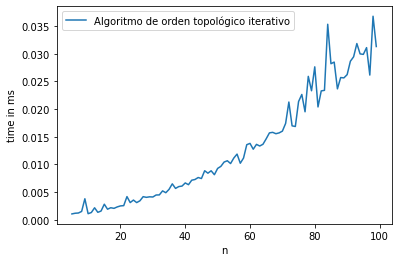

In [267]:
def instanciador(n):
  a,a1 = graph_to_nxdigraph(graph_instance_creator(n))
  iterative(a,a1,False,False)

x=[]; y=[]; y1=[]

for n in range(5,100):

  
  #la función repeat está ejecutando 10 veces el algoritmo iterativo
  t =repeat(setup="from __main__ import instanciador", stmt=f"instanciador({n})", repeat=1, number=5)
  

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["Algoritmo de orden topológico iterativo"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

###Análisis de experimento 1

Para este experimento, podemos interpretar que el tiempo de ejecución de coincide con la complejidad temporal establecida teóricamente $(O(V+E))$, puesto que los arcos y nodos generados no están en alguna razón, se ve la curva poco fluida y no como una curva limpia, en base a esto podemos establecer que el análisis del tiempo de ejecución es correcto.

###Experimento 2.

Para este segundo experimento, se analizará el tiempo de ejecución del algoritmo de orden topológico recursivo. Como ya fue comprobado en el experimento anterior que nuestro análisis del tiempo de ejecución para el algoritmo es correcto, podemos ver cómo evoluciona el algoritmo recursivo a medida que tiene más nodos, por lo que, se establece la siguiente hipótesis.

**Hipótesis:** *Dado que el tiempo de ejecución teórico para el algoritmo iterativo es correcto y es O(V+E), podemos esperar que el tiempo de ejecución del algoritmo recursivo sea aproximadamente igual o mayor que el algoritmo iterativo.*

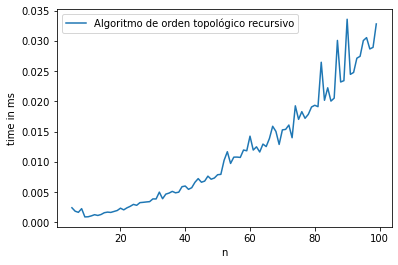

In [266]:
def instanciador1(n):
  a,a1 = graph_to_nxdigraph(graph_instance_creator(n))
  recursive(a,a1,False,False)

x=[]; y=[]; y1=[]

for n in range(5,100):

  
  #la función repeat está ejecutando 10 veces el algoritmo iterativo
  t =repeat(setup="from __main__ import instanciador1", stmt=f"instanciador1({n})", repeat=1, number=5)
  

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["Algoritmo de orden topológico recursivo"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

###Análisis de experimento 2

Para este experimento, podemos comprobar lo establecido en nuestra hipótesis, el algoritmo recursivo es aproximadamente igual en tiempo de ejecución al algoritmo iterativo, en consecuencia nos asegura en su totalidad que el análisis del tiempo de ejecución es correcto.



#7. Conclusión

En base a lo investigado, formulado y aprendido, se puede concluir que el algoritmo para crear el orden topológico de un grafo si es correcto, y es muy eficaz, debido a que podemos tener una gran cantidad de nodos y arcos, pero puesto que son valores que pueden ser computados por una maquina muy rápido, encontrar una solución tomará segundos, ya que depende de sus nodos y arcos, esto dado un grafo que siga las restricciones para establecer el orden topológico.